Plot equivalent ORFs:
- EAIS + WEDD + AMUN + ROSS + PENS
- TOTL
- 2  * HALF
- .5 * DOUB

In [2]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
ds = xr.open_dataset('../data/dummy.nc')

In [4]:
mpl.rcParams['lines.linewidth'] = 2.
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 9
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['figure.subplot.wspace'] = .1
mpl.rcParams['figure.subplot.left'] = .2
mpl.rcParams['figure.subplot.right'] = .99
mpl.rcParams['figure.subplot.bottom'] = .1
mpl.rcParams['figure.subplot.top'] = .95
mpl.rcParams['figure.figsize'] = (7,4.5)
bcol = ['tab:blue','tab:orange','tab:red','tab:purple','tab:green']

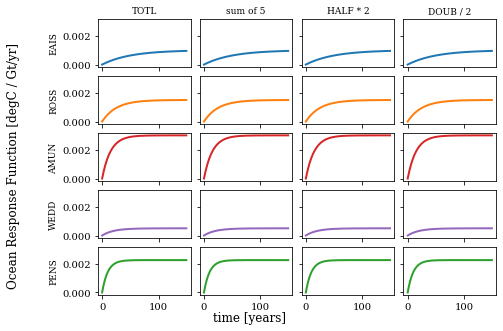

In [6]:
fig,ax = plt.subplots(5,4,sharex=True,sharey=True)
for b,bas in enumerate(ds.basin.values):
    ax[b,0].plot(ds.rftime,ds.orf[:,5,b],c=bcol[b])
    ax[b,1].plot(ds.rftime,np.sum(ds.orf[:,:5,b],axis=1),c=bcol[b])
    ax[b,2].plot(ds.rftime,2*ds.orf[:,6,b],c=bcol[b])
    ax[b,3].plot(ds.rftime,.5*ds.orf[:,7,b],c=bcol[b])

    ax[b,0].set_ylabel(bas)
ax[0,0].set_title('TOTL')
ax[0,1].set_title('sum of 5')
ax[0,2].set_title('HALF * 2')
ax[0,3].set_title('DOUB / 2')
fig.supxlabel('time [years]')
fig.supylabel('Ocean Response Function [degC / Gt/yr]')

plt.savefig(f'../draftfigs/linearitycheck.png',dpi=450)
plt.show()